# Winter AQI–Weather Relationship Analysis (India)

**Objective:**  
To understand how meteorological factors influence PM2.5 concentrations during winter, focusing on *explanatory analysis* rather than prediction.

**Scope:**  
- Period: **15 Oct – 23 Dec 2025**
- Pollutant: **PM2.5**
- Geography: India (city-level)
- Methodology: Correlation analysis + Lag analysis + OLS regression

## Data Sources

- **Air Quality Data:** Open-Meteo Air Quality API  
- **Weather Data:** Open-Meteo Weather API  

Variables used:
- Temperature (2m)
- Relative Humidity (2m)
- Wind Speed (10m)
- Precipitation
- Mean Sea Level Pressure

Hourly data is aggregated to daily values for stability and interpretability.

## Motivation for Winter-Only Analysis

Winter months experience:
- Thermal inversion
- Atmospheric stagnation
- Reduced dispersion

To eliminate seasonal confounding, the analysis is **restricted to winter only**.

## Feature Engineering

Steps performed:
- Conversion from hourly to daily data
- Creation of lagged variables (t−1)
- Binary rain indicator
- Weekend indicator

Lagged variables are used to reflect physical persistence in atmospheric processes.

## Exploratory Analysis

Initial correlation analysis is performed to:
- Understand pairwise relationships
- Identify expected vs counter-intuitive patterns
- Motivate the need for multivariate regression

## Lag Analysis (Winter)

Lagged correlations help test whether **yesterday’s weather** influences **today’s PM2.5**.

Key expectations:
- Temperature (lag-1): strong negative
- Rain (lag-1): weak
- Wind (lag-1): mixed due to dispersion vs transport

## Regression Methodology: Ordinary Least Squares (OLS)

OLS is used because:
- The objective is **interpretation**, not prediction
- Coefficients are directly interpretable
- Standard method in environmental and atmospheric studies

Model structure:
PM2.5(t) ~ Wind(t−1) + Rain(t−1) + Temperature(t−1) + Humidity(t) + Pressure(t)

## Results & Interpretation (Summary)

- **Temperature:** Dominant driver (negative, significant)
- **Humidity:** Secondary but significant
- **Wind:** No stable independent effect
- **Rain:** Short-lived washout only
- **Pressure:** Indirect, absorbed via temperature

Conclusion:
Winter PM2.5 variability is primarily governed by **atmospheric stability** rather than short-term dispersion.

## Limitations & Future Work

Limitations:
- No emissions data
- Daily aggregation smooths extremes
- Autocorrelation present

Future scope:
- ARIMAX models
- Boundary layer height
- City-wise comparison
- Policy intervention analysis

In [1]:
import pandas as pd
import requests as re
import datetime as dt

In [2]:
start_date, end_date='2025-10-15','2025-12-23'
url=f'https://air-quality-api.open-meteo.com/v1/air-quality?latitude=28.6519&longitude=77.2315&hourly=pm2_5&start_date={start_date}&end_date={end_date}'
response= re.get(url)

In [3]:
response.json()

{'latitude': 28.700005,
 'longitude': 77.20001,
 'generationtime_ms': 0.164031982421875,
 'utc_offset_seconds': 0,
 'timezone': 'GMT',
 'timezone_abbreviation': 'GMT',
 'elevation': 231.0,
 'hourly_units': {'time': 'iso8601', 'pm2_5': 'μg/m³'},
 'hourly': {'time': ['2025-10-15T00:00',
   '2025-10-15T01:00',
   '2025-10-15T02:00',
   '2025-10-15T03:00',
   '2025-10-15T04:00',
   '2025-10-15T05:00',
   '2025-10-15T06:00',
   '2025-10-15T07:00',
   '2025-10-15T08:00',
   '2025-10-15T09:00',
   '2025-10-15T10:00',
   '2025-10-15T11:00',
   '2025-10-15T12:00',
   '2025-10-15T13:00',
   '2025-10-15T14:00',
   '2025-10-15T15:00',
   '2025-10-15T16:00',
   '2025-10-15T17:00',
   '2025-10-15T18:00',
   '2025-10-15T19:00',
   '2025-10-15T20:00',
   '2025-10-15T21:00',
   '2025-10-15T22:00',
   '2025-10-15T23:00',
   '2025-10-16T00:00',
   '2025-10-16T01:00',
   '2025-10-16T02:00',
   '2025-10-16T03:00',
   '2025-10-16T04:00',
   '2025-10-16T05:00',
   '2025-10-16T06:00',
   '2025-10-16T07:00',
 

In [4]:
rejson=response.json()

In [5]:
df=pd.DataFrame(rejson['hourly'])
df['time']=pd.to_datetime(df['time'])
df

,time,pm2_5
0,2025-10-15 00:00:00,99.2
1,2025-10-15 01:00:00,106.4
2,2025-10-15 02:00:00,118.3
3,2025-10-15 03:00:00,95.2
4,2025-10-15 04:00:00,70.8
...,...,...
1675,2025-12-23 19:00:00,85.7
1676,2025-12-23 20:00:00,78.9
1677,2025-12-23 21:00:00,72.6
1678,2025-12-23 22:00:00,66.8


In [6]:
df['date']= df['time'].dt.date
df

,time,pm2_5,date
0,2025-10-15 00:00:00,99.2,2025-10-15
1,2025-10-15 01:00:00,106.4,2025-10-15
2,2025-10-15 02:00:00,118.3,2025-10-15
3,2025-10-15 03:00:00,95.2,2025-10-15
4,2025-10-15 04:00:00,70.8,2025-10-15
...,...,...,...
1675,2025-12-23 19:00:00,85.7,2025-12-23
1676,2025-12-23 20:00:00,78.9,2025-12-23
1677,2025-12-23 21:00:00,72.6,2025-12-23
1678,2025-12-23 22:00:00,66.8,2025-12-23


In [7]:

daily_avg_aqi = (
    df
    .groupby('date', as_index=False)['pm2_5']
    .mean()
)

In [8]:
daily_avg_aqi

,date,pm2_5
0,2025-10-15,60.254167
1,2025-10-16,59.508333
2,2025-10-17,66.350000
3,2025-10-18,88.095833
4,2025-10-19,96.145833
...,...,...
65,2025-12-19,113.604167
66,2025-12-20,161.987500
67,2025-12-21,213.433333
68,2025-12-22,216.612500


In [9]:
url_weather=f'https://climate-api.open-meteo.com/v1/climate?latitude=28.6519&longitude=77.2315&start_date={start_date}&end_date={end_date}&models=CMCC_CM2_VHR4&daily=temperature_2m_mean,relative_humidity_2m_mean,wind_speed_10m_mean,wind_speed_10m_max,precipitation_sum,pressure_msl_mean'
weather_response= re.get(url_weather)
weather_response.json()

{'latitude': 28.700005,
 'longitude': 77.20001,
 'generationtime_ms': 40.771484375,
 'utc_offset_seconds': 0,
 'timezone': 'GMT',
 'timezone_abbreviation': 'GMT',
 'elevation': 231.0,
 'daily_units': {'time': 'iso8601',
  'temperature_2m_mean': '°C',
  'relative_humidity_2m_mean': '%',
  'wind_speed_10m_mean': 'km/h',
  'wind_speed_10m_max': 'km/h',
  'precipitation_sum': 'mm',
  'pressure_msl_mean': 'hPa'},
 'daily': {'time': ['2025-10-15',
   '2025-10-16',
   '2025-10-17',
   '2025-10-18',
   '2025-10-19',
   '2025-10-20',
   '2025-10-21',
   '2025-10-22',
   '2025-10-23',
   '2025-10-24',
   '2025-10-25',
   '2025-10-26',
   '2025-10-27',
   '2025-10-28',
   '2025-10-29',
   '2025-10-30',
   '2025-10-31',
   '2025-11-01',
   '2025-11-02',
   '2025-11-03',
   '2025-11-04',
   '2025-11-05',
   '2025-11-06',
   '2025-11-07',
   '2025-11-08',
   '2025-11-09',
   '2025-11-10',
   '2025-11-11',
   '2025-11-12',
   '2025-11-13',
   '2025-11-14',
   '2025-11-15',
   '2025-11-16',
   '2025-1

In [10]:
weather_df= pd.DataFrame(weather_response.json()['daily'])


In [11]:

final_df= pd.concat([daily_avg_aqi[['date','pm2_5']],weather_df.drop(columns=['time'])],axis=1)


In [12]:
final_df["rain_dummy"] = (final_df["precipitation_sum"] > 1).astype(int)

In [13]:
final_df.drop(columns=['date']).corr()

,pm2_5,temperature_2m_mean,relative_humidity_2m_mean,wind_speed_10m_mean,wind_speed_10m_max,precipitation_sum,pressure_msl_mean,rain_dummy
pm2_5,1.000000,-0.449471,-0.142264,0.159026,0.257443,-0.218792,0.322914,-0.215178
temperature_2m_mean,-0.449471,1.000000,-0.321117,-0.264704,-0.255272,0.038351,-0.647913,0.115918
relative_humidity_2m_mean,-0.142264,-0.321117,1.000000,0.138244,-0.137975,0.432913,0.046475,0.428247
wind_speed_10m_mean,0.159026,-0.264704,0.138244,1.000000,0.409770,0.120584,0.066437,0.285171
wind_speed_10m_max,0.257443,-0.255272,-0.137975,0.409770,1.000000,0.244446,0.174769,0.207365
precipitation_sum,-0.218792,0.038351,0.432913,0.120584,0.244446,1.000000,-0.227589,0.821431
pressure_msl_mean,0.322914,-0.647913,0.046475,0.066437,0.174769,-0.227589,1.000000,-0.330329
rain_dummy,-0.215178,0.115918,0.428247,0.285171,0.207365,0.821431,-0.330329,1.000000


In [14]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

scaled_array= scaler.fit_transform(final_df.drop(columns='date'))
scaled_array

scaled_final_df=pd.concat([final_df['date'],pd.DataFrame(scaled_array,columns=final_df.columns.values[1:])],axis=1)

In [15]:
scaled_final_df

,date,pm2_5,temperature_2m_mean,relative_humidity_2m_mean,wind_speed_10m_mean,wind_speed_10m_max,precipitation_sum,pressure_msl_mean,rain_dummy
0,2025-10-15,-1.017870,1.685932,-1.653680,0.111627,-0.322511,-0.360878,-0.380345,-0.408248
1,2025-10-16,-1.035107,1.621816,-1.554318,-0.400201,-1.190810,-0.360878,-1.315892,-0.408248
2,2025-10-17,-0.876994,1.579072,-1.852406,-0.946151,-1.279867,-0.360878,-1.705704,-0.408248
3,2025-10-18,-0.374443,1.536329,-1.753043,-1.082638,-0.300247,-0.360878,-2.173478,-0.408248
4,2025-10-19,-0.188406,1.600444,-1.057504,-0.229591,-0.367039,-0.360878,-1.627741,-0.408248
...,...,...,...,...,...,...,...,...,...
65,2025-12-19,0.215060,-1.156521,0.134849,0.213993,1.458615,-0.360878,1.061958,-0.408248
66,2025-12-20,1.333209,-1.220636,0.631663,1.169405,0.701637,-0.360878,0.906033,-0.408248
67,2025-12-21,2.522134,-1.391611,1.128477,0.691699,0.278619,-0.360878,0.516222,-0.408248
68,2025-12-22,2.595605,-1.434355,0.929752,0.384602,0.612580,-0.360878,1.100939,-0.408248


In [16]:
scaled_final_df.drop(columns=['date']).corr()

,pm2_5,temperature_2m_mean,relative_humidity_2m_mean,wind_speed_10m_mean,wind_speed_10m_max,precipitation_sum,pressure_msl_mean,rain_dummy
pm2_5,1.000000,-0.449471,-0.142264,0.159026,0.257443,-0.218792,0.322914,-0.215178
temperature_2m_mean,-0.449471,1.000000,-0.321117,-0.264704,-0.255272,0.038351,-0.647913,0.115918
relative_humidity_2m_mean,-0.142264,-0.321117,1.000000,0.138244,-0.137975,0.432913,0.046475,0.428247
wind_speed_10m_mean,0.159026,-0.264704,0.138244,1.000000,0.409770,0.120584,0.066437,0.285171
wind_speed_10m_max,0.257443,-0.255272,-0.137975,0.409770,1.000000,0.244446,0.174769,0.207365
precipitation_sum,-0.218792,0.038351,0.432913,0.120584,0.244446,1.000000,-0.227589,0.821431
pressure_msl_mean,0.322914,-0.647913,0.046475,0.066437,0.174769,-0.227589,1.000000,-0.330329
rain_dummy,-0.215178,0.115918,0.428247,0.285171,0.207365,0.821431,-0.330329,1.000000


In [17]:
final_df['day']=pd.to_datetime(final_df['date']).dt.day_of_week
final_df.drop(columns=['date']).corr()

,pm2_5,temperature_2m_mean,relative_humidity_2m_mean,wind_speed_10m_mean,wind_speed_10m_max,precipitation_sum,pressure_msl_mean,rain_dummy,day
pm2_5,1.000000,-0.449471,-0.142264,0.159026,0.257443,-0.218792,0.322914,-0.215178,0.111920
temperature_2m_mean,-0.449471,1.000000,-0.321117,-0.264704,-0.255272,0.038351,-0.647913,0.115918,0.056177
relative_humidity_2m_mean,-0.142264,-0.321117,1.000000,0.138244,-0.137975,0.432913,0.046475,0.428247,0.042584
wind_speed_10m_mean,0.159026,-0.264704,0.138244,1.000000,0.409770,0.120584,0.066437,0.285171,-0.009505
wind_speed_10m_max,0.257443,-0.255272,-0.137975,0.409770,1.000000,0.244446,0.174769,0.207365,-0.037849
precipitation_sum,-0.218792,0.038351,0.432913,0.120584,0.244446,1.000000,-0.227589,0.821431,-0.041596
pressure_msl_mean,0.322914,-0.647913,0.046475,0.066437,0.174769,-0.227589,1.000000,-0.330329,-0.250593
rain_dummy,-0.215178,0.115918,0.428247,0.285171,0.207365,0.821431,-0.330329,1.000000,0.020412
day,0.111920,0.056177,0.042584,-0.009505,-0.037849,-0.041596,-0.250593,0.020412,1.000000


In [18]:
corr= final_df.drop(columns=['date']).corr()

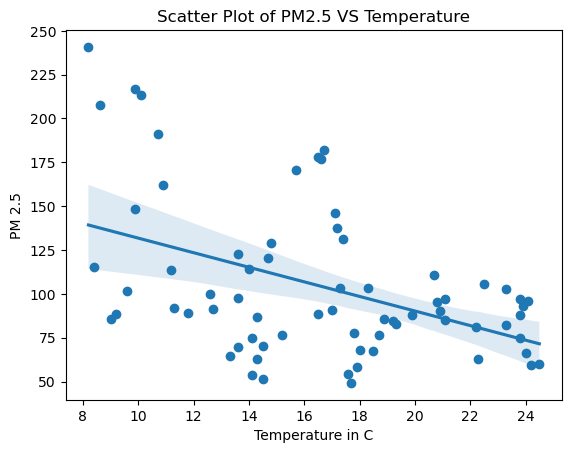

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.scatter(final_df['temperature_2m_mean'],final_df['pm2_5'],marker='o')

sns.regplot(x=final_df['temperature_2m_mean'],y=final_df['pm2_5'],scatter=False)
plt.xlabel('Temperature in C')
plt.ylabel('PM 2.5')
plt.title('Scatter Plot of PM2.5 VS Temperature')
plt.show()

Text(0.5, 1.0, 'Scatter Plot of PM2.5 VS Relative humidity')

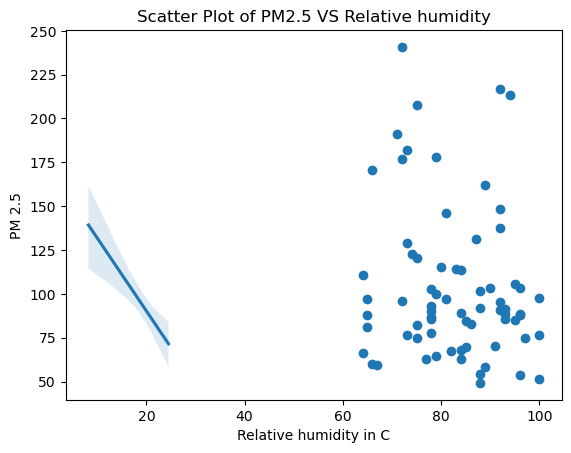

In [20]:
import matplotlib.pyplot as plt

plt.scatter(final_df['relative_humidity_2m_mean'],final_df['pm2_5'],marker='o')
sns.regplot(x=final_df['temperature_2m_mean'],y=final_df['pm2_5'],scatter=False)

plt.xlabel('Relative humidity in C')
plt.ylabel('PM 2.5')
plt.title('Scatter Plot of PM2.5 VS Relative humidity')

Text(0.5, 1.0, 'Scatter Plot of PM2.5 VS WindSpeed')

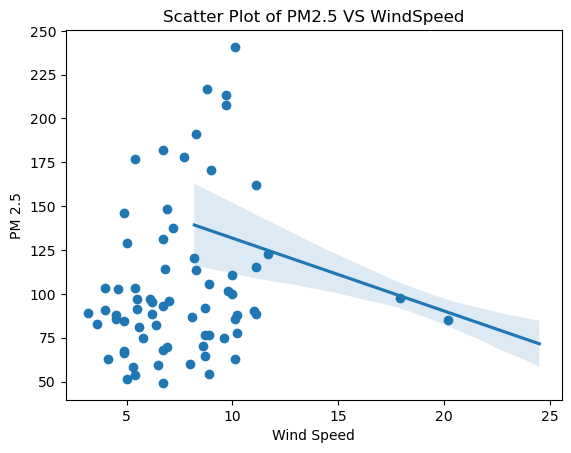

In [21]:


plt.scatter(final_df['wind_speed_10m_mean'],final_df['pm2_5'],marker='o')
sns.regplot(x=final_df['temperature_2m_mean'],y=final_df['pm2_5'],scatter=False)

plt.xlabel('Wind Speed')
plt.ylabel('PM 2.5')
plt.title('Scatter Plot of PM2.5 VS WindSpeed')

Text(0.5, 1.0, 'Heat Plot of Correlation Matrix')

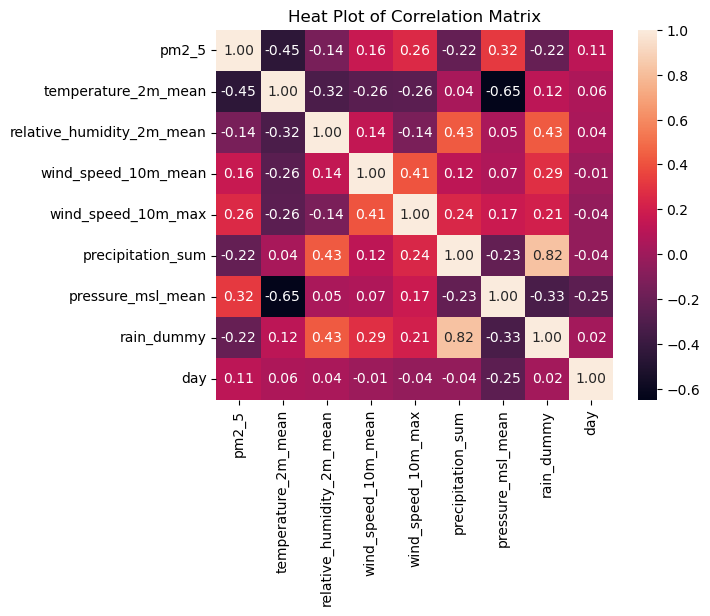

In [22]:

sns.heatmap(corr, annot=True, fmt='.2f')
plt.title('Heat Plot of Correlation Matrix')


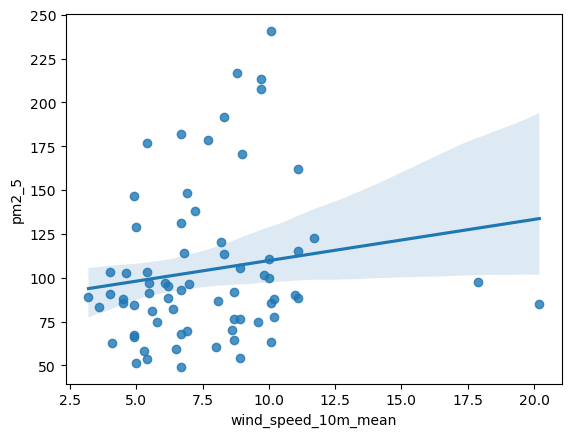

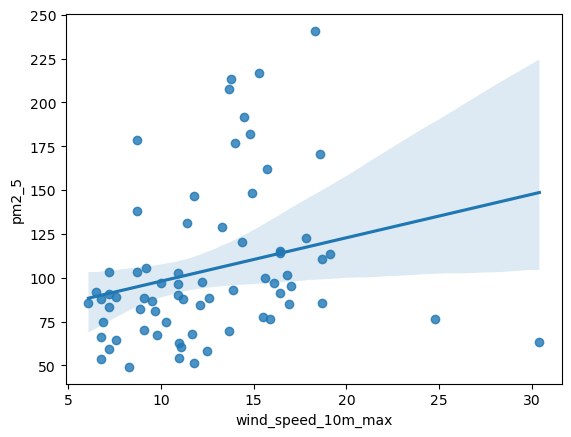

In [23]:
sns.regplot(
    x= final_df['wind_speed_10m_mean'],
    y= final_df['pm2_5']
)
plt.show()
sns.regplot(
    x= final_df['wind_speed_10m_max'],
    y= final_df['pm2_5']
)
plt.show()

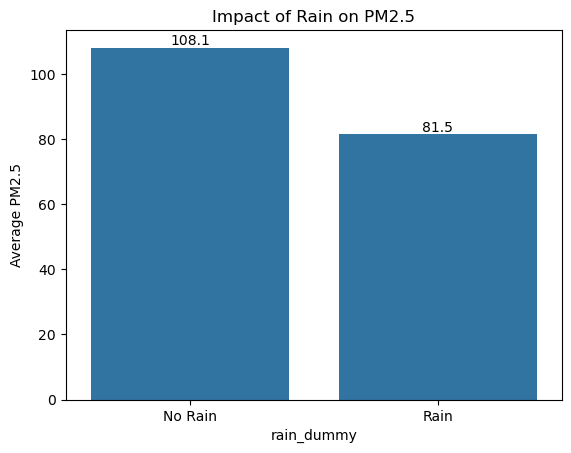

In [24]:
rain_effect = final_df.groupby("rain_dummy")["pm2_5"].mean()
ax = sns.barplot(rain_effect)
ax.bar_label(ax.containers[0],fmt='%.1f')
plt.xticks([0,1], ["No Rain", "Rain"], rotation=0)
plt.ylabel("Average PM2.5")
plt.title("Impact of Rain on PM2.5")
plt.show()


In [25]:
final_df.describe()

,pm2_5,temperature_2m_mean,relative_humidity_2m_mean,wind_speed_10m_mean,wind_speed_10m_max,precipitation_sum,pressure_msl_mean,rain_dummy,day
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
mean,104.298333,16.611429,82.642857,7.672857,12.548571,0.546571,1014.475714,0.142857,3.000000
std,43.583326,4.712842,10.136797,2.951832,4.523970,1.525497,2.583865,0.352454,2.014441
min,49.191667,8.200000,64.000000,3.200000,6.100000,0.000000,1008.700000,0.000000,0.000000
25%,76.553125,13.600000,75.000000,5.425000,9.100000,0.000000,1012.825000,0.000000,1.000000
50%,91.008333,16.850000,83.500000,6.950000,11.800000,0.000000,1014.300000,0.000000,3.000000
75%,115.106250,20.500000,92.000000,9.450000,15.575000,0.082500,1015.775000,0.000000,5.000000
max,240.820833,24.500000,100.000000,20.200000,30.400000,7.930000,1020.600000,1.000000,6.000000


In [26]:
temp_final_df=final_df
temp_final_df["is_weekend"] = final_df["day"].isin([5, 6]).astype(int)
temp_final_df

,date,pm2_5,temperature_2m_mean,relative_humidity_2m_mean,wind_speed_10m_mean,wind_speed_10m_max,precipitation_sum,pressure_msl_mean,rain_dummy,day,is_weekend
0,2025-10-15,60.254167,24.5,66,8.0,11.1,0.0,1013.5,0,2,0
1,2025-10-16,59.508333,24.2,67,6.5,7.2,0.0,1011.1,0,3,0
2,2025-10-17,66.350000,24.0,64,4.9,6.8,0.0,1010.1,0,4,0
3,2025-10-18,88.095833,23.8,65,4.5,11.2,0.0,1008.9,0,5,1
4,2025-10-19,96.145833,24.1,72,7.0,10.9,0.0,1010.3,0,6,1
...,...,...,...,...,...,...,...,...,...,...,...
65,2025-12-19,113.604167,11.2,84,8.3,19.1,0.0,1017.2,0,4,0
66,2025-12-20,161.987500,10.9,89,11.1,15.7,0.0,1016.8,0,5,1
67,2025-12-21,213.433333,10.1,94,9.7,13.8,0.0,1015.8,0,6,1
68,2025-12-22,216.612500,9.9,92,8.8,15.3,0.0,1017.3,0,0,0


In [27]:
temp_final_df.drop(columns=['date']).corr()

,pm2_5,temperature_2m_mean,relative_humidity_2m_mean,wind_speed_10m_mean,wind_speed_10m_max,precipitation_sum,pressure_msl_mean,rain_dummy,day,is_weekend
pm2_5,1.000000,-0.449471,-0.142264,0.159026,0.257443,-0.218792,0.322914,-0.215178,0.111920,0.140717
temperature_2m_mean,-0.449471,1.000000,-0.321117,-0.264704,-0.255272,0.038351,-0.647913,0.115918,0.056177,0.017379
relative_humidity_2m_mean,-0.142264,-0.321117,1.000000,0.138244,-0.137975,0.432913,0.046475,0.428247,0.042584,0.060149
wind_speed_10m_mean,0.159026,-0.264704,0.138244,1.000000,0.409770,0.120584,0.066437,0.285171,-0.009505,-0.104203
wind_speed_10m_max,0.257443,-0.255272,-0.137975,0.409770,1.000000,0.244446,0.174769,0.207365,-0.037849,-0.061755
precipitation_sum,-0.218792,0.038351,0.432913,0.120584,0.244446,1.000000,-0.227589,0.821431,-0.041596,-0.067678
pressure_msl_mean,0.322914,-0.647913,0.046475,0.066437,0.174769,-0.227589,1.000000,-0.330329,-0.250593,-0.086465
rain_dummy,-0.215178,0.115918,0.428247,0.285171,0.207365,0.821431,-0.330329,1.000000,0.020412,-0.077460
day,0.111920,0.056177,0.042584,-0.009505,-0.037849,-0.041596,-0.250593,0.020412,1.000000,0.790569
is_weekend,0.140717,0.017379,0.060149,-0.104203,-0.061755,-0.067678,-0.086465,-0.077460,0.790569,1.000000


[Text(0, 0, '100.447'), Text(0, 0, '113.926')]

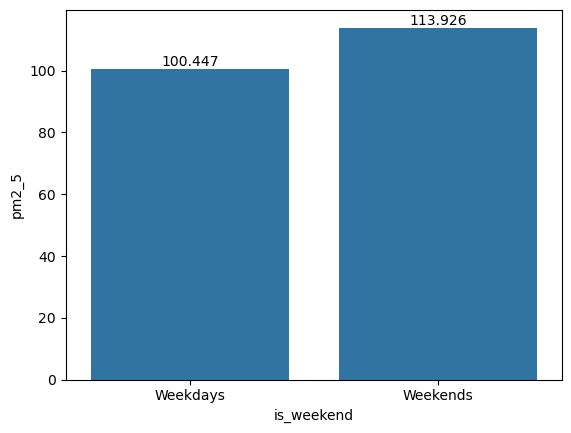

In [28]:

ax= sns.barplot(data=temp_final_df.groupby('is_weekend')['pm2_5'].mean())
plt.xticks([0,1],labels=['Weekdays','Weekends'])
ax.bar_label(ax.containers[0])

# **LAG Analysis**

In [29]:
temp_final_df['wind_lag1']= temp_final_df['wind_speed_10m_mean'].shift(periods=1)
temp_final_df['rain_lag1']= temp_final_df['rain_dummy'].shift(periods=1)
temp_final_df['temp_lag1']= temp_final_df['temperature_2m_mean'].shift(periods=1)

In [30]:
temp_final_df

,date,pm2_5,temperature_2m_mean,relative_humidity_2m_mean,wind_speed_10m_mean,wind_speed_10m_max,precipitation_sum,pressure_msl_mean,rain_dummy,day,is_weekend,wind_lag1,rain_lag1,temp_lag1
0,2025-10-15,60.254167,24.5,66,8.0,11.1,0.0,1013.5,0,2,0,NaN,NaN,NaN
1,2025-10-16,59.508333,24.2,67,6.5,7.2,0.0,1011.1,0,3,0,8.0,0.0,24.5
2,2025-10-17,66.350000,24.0,64,4.9,6.8,0.0,1010.1,0,4,0,6.5,0.0,24.2
3,2025-10-18,88.095833,23.8,65,4.5,11.2,0.0,1008.9,0,5,1,4.9,0.0,24.0
4,2025-10-19,96.145833,24.1,72,7.0,10.9,0.0,1010.3,0,6,1,4.5,0.0,23.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,2025-12-19,113.604167,11.2,84,8.3,19.1,0.0,1017.2,0,4,0,6.9,0.0,9.9
66,2025-12-20,161.987500,10.9,89,11.1,15.7,0.0,1016.8,0,5,1,8.3,0.0,11.2
67,2025-12-21,213.433333,10.1,94,9.7,13.8,0.0,1015.8,0,6,1,11.1,0.0,10.9
68,2025-12-22,216.612500,9.9,92,8.8,15.3,0.0,1017.3,0,0,0,9.7,0.0,10.1


In [31]:
temp_final_df[['pm2_5','wind_lag1','rain_lag1','temp_lag1']].corr()

,pm2_5,wind_lag1,rain_lag1,temp_lag1
pm2_5,1.000000,0.203648,-0.099188,-0.389767
wind_lag1,0.203648,1.000000,0.290928,-0.254066
rain_lag1,-0.099188,0.290928,1.000000,0.108969
temp_lag1,-0.389767,-0.254066,0.108969,1.000000


In [32]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
import pandas as pd


In [33]:
base_features = [
    "wind_speed_10m_mean",
    "rain_dummy",
    "temperature_2m_mean",
    "relative_humidity_2m_mean",
    "pressure_msl_mean",
    "is_weekend"
]

X_base = final_df[base_features]
y = final_df["pm2_5"]

X_base = sm.add_constant(X_base)

base_model = sm.OLS(y, X_base, missing="drop").fit()
print(base_model.summary())


                            OLS Regression Results                            
Dep. Variable:                  pm2_5   R-squared:                       0.329
Model:                            OLS   Adj. R-squared:                  0.265
Method:                 Least Squares   F-statistic:                     5.151
Date:                Fri, 26 Dec 2025   Prob (F-statistic):           0.000231
Time:                        20:41:28   Log-Likelihood:                -349.08
No. Observations:                  70   AIC:                             712.2
Df Residuals:                      63   BIC:                             727.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [34]:
lag_features = [
    "wind_lag1",
    "rain_lag1",
    "temp_lag1",
    "relative_humidity_2m_mean",
    "pressure_msl_mean"
]

X_lag = final_df[lag_features]
y = final_df["pm2_5"]

X_lag = sm.add_constant(X_lag)

winter_lag_model = sm.OLS(y, X_lag, missing="drop").fit()
print(winter_lag_model.summary())


                            OLS Regression Results                            
Dep. Variable:                  pm2_5   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.217
Method:                 Least Squares   F-statistic:                     4.773
Date:                Fri, 26 Dec 2025   Prob (F-statistic):           0.000922
Time:                        20:41:28   Log-Likelihood:                -346.75
No. Observations:                  69   AIC:                             705.5
Df Residuals:                      63   BIC:                             718.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

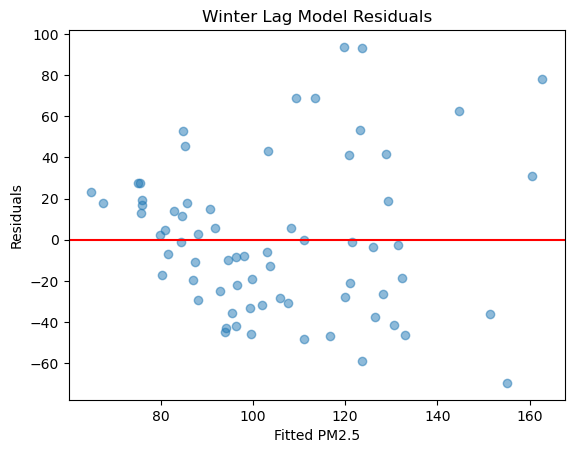

In [35]:
import matplotlib.pyplot as plt

plt.scatter(winter_lag_model.fittedvalues,
            winter_lag_model.resid,
            alpha=0.5)
plt.axhline(0, color="red")
plt.xlabel("Fitted PM2.5")
plt.ylabel("Residuals")
plt.title("Winter Lag Model Residuals")
plt.show()
